In [1]:
import sys
import numpy as np
filename = "Python-Machine-Learning-Cookbook/Chapter01/data_singlevar.txt"
X = []
y = []

with open(filename, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        xt, yt = data[:-1], data[-1]
        X.append(xt)
        y.append(yt)

print ("X:\n", X)
print ("y:\n", y)

X:
 [[4.94], [-1.58], [-4.45], [-6.06], [-1.22], [-3.55], [0.36], [-3.24], [1.31], [2.17], [2.94], [-0.92], [-0.91], [1.24], [1.56], [-4.14], [3.75], [4.15], [0.33], [3.41], [2.27], [2.6], [1.06], [1.04], [2.74], [-0.71], [-2.75], [0.55], [-3.45], [1.09], [2.47], [-6.35], [1.83], [-0.68], [-3.83], [-2.03], [3.13], [0.92], [4.02], [3.89], [-1.81], [3.94], [-2.0], [0.54], [0.78], [2.15], [2.55], [-0.63], [1.06], [-0.36]]
y:
 [4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]


In [2]:
num_training = int(0.8*len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training])
y_train = np.array(y[:num_training])

# Testing data
X_test = np.array(X[num_training:])
y_test = np.array(y[num_training:])

In [3]:
from sklearn import linear_model

# Create linear regression object
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

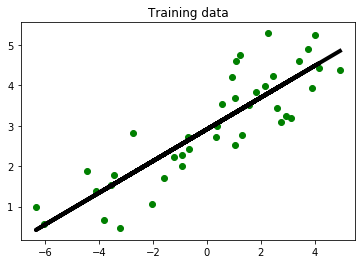

In [4]:
# Plot the training data
import matplotlib.pyplot as plt

y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

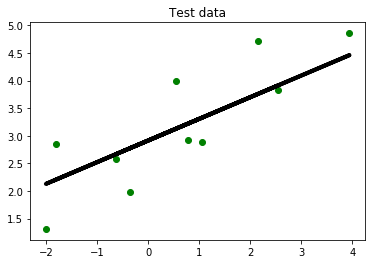

In [5]:
# Plot the test data
y_test_pred = linear_regressor.predict(X_test)

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

In [6]:
# Report on the metrics of this linear regression
import sklearn.metrics as sm
print ("Mean absolute error:      ", round(sm.mean_absolute_error(y_test, y_test_pred), 3))
print ("Mean squared error:       ", round(sm.mean_squared_error(y_test, y_test_pred), 3))
print ("Median absolute error:    ", round(sm.median_absolute_error(y_test, y_test_pred), 3))
print ("Explained variance score: ", round(sm.explained_variance_score(y_test, y_test_pred), 3))
print ("R2 score:                 ", round(sm.r2_score(y_test, y_test_pred), 3))

Mean absolute error:       0.539
Mean squared error:        0.383
Median absolute error:     0.543
Explained variance score:  0.676
R2 score:                  0.675


In [7]:
# Save the regression model
import pickle

output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb') as fw:
    pickle.dump(linear_regressor, fw)
fw.close()  

In [8]:
# Load the saved regression model
with open(output_model_file, 'rb') as fr:
    model_linregr = pickle.load(fr)
fr.close()

y_test_pred_new = model_linregr.predict(X_test)
print ("New mean absolute error: ", round(sm.mean_absolute_error(y_test, y_test_pred_new), 3))

New mean absolute error:  0.539
